In [188]:
import pandas as pd
import numpy as np
import astropy as ast
import matplotlib.pyplot as plt
import statistics as stat
from scipy import stats
from scipy.stats import norm, t
from scipy.stats import gamma
from scipy.special import ndtri

Kibergrad = pd.read_csv('Kibergrad.csv')

In [189]:
Kibergrad

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA
0,1,2,0,43450,1,39
1,1,2,0,79000,1,40
2,1,2,0,51306,1,39
3,1,4,2,24850,1,41
4,1,4,2,65145,1,43
...,...,...,...,...,...,...
43881,1,5,3,30800,4,36
43882,1,2,0,16684,4,34
43883,1,2,0,12000,4,39
43884,1,2,0,50022,4,34


In [190]:
dohodki = Kibergrad.DOHODEK


In [191]:
IQR = stats.iqr(dohodki, rng=(25, 75), scale=1, nan_policy="omit")
n = len(dohodki)
sirina1 = 2*IQR/np.cbrt(n)
sirina = 2000 #smiselno zaokrožimo
strazredov = int(np.ceil((dohodki.max() - dohodki.min()) / sirina))
IQR, n, sirina1, sirina, strazredov

(37527.75, 43886, 2127.847614822404, 2000, 238)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        8.000e+00, 7.000e+00, 6.000e+00, 6.000e+00, 1.200e+01, 8.380e+02,
        7.050e+02, 9.800e+02, 1.077e+03, 1.229e+03, 1.353e+03, 1.400e+03,
        1.491e+03, 1.354e+03, 1.428e+03, 1.414e+03, 1.304e+03, 1.532e+03,
        1.325e+03, 1.256e+03, 1.382e+03, 1.289e+03, 1.228e+03, 1.155e+03,
        1.162e+03, 1.217e+03, 1.059e+03, 1.047e+03, 9.500e+02, 8.970e+02,
        9.860e+02, 8.920e+02, 8.220e+02, 7.470e+02, 6.780e+02, 7.060e+02,
        6.150e+02, 5.860e+02, 5.100e+02, 4.670e+02, 4.760e+02, 4.400e+02,
        4.110e+02, 3.520e+02, 2.990e+02, 3.340e+02, 2.780e+02, 2.730e+02,
        2.500e+02, 2.370e+02, 2.270e+02, 2.170e+02, 1.660e+02, 1.750e+02,
        1.550e+02, 2.210e+02, 1.850e+02, 1.650e+02, 1.410e+02, 1.170e+02,
        1.100e+02, 1.020e+02, 1.080e+02, 8.100e+01, 6.900e+01, 8.600e+01,
        7.400e+01, 5.800e+01, 6.700e+01, 5.000e+01, 5.300e+01, 3.700e+01,
        4.600e+01, 4.700e+01, 5.100e+0

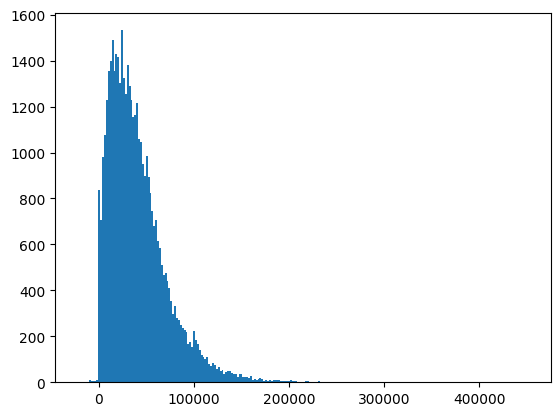

In [192]:
plt.hist(dohodki, bins=strazredov)

In [193]:
povprecje = dohodki.mean()
std = dohodki.std()
povprecje,std

(41335.50704096979, 32037.61941788666)

In [194]:
zacetek =  (int(dohodki.min())//sirina)*sirina
konec = (int(dohodki.max())//sirina+1)*sirina

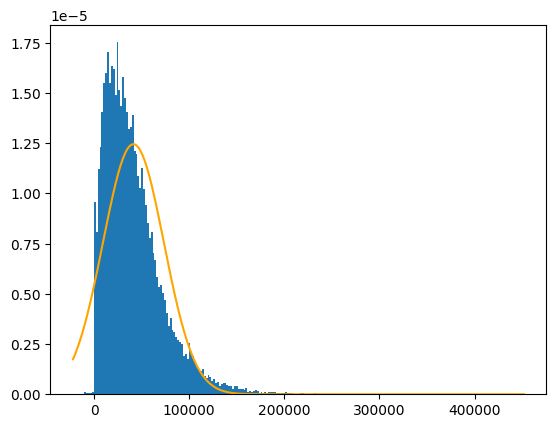

In [195]:
x = np.linspace(dohodki.min(), dohodki.max(), n)
plt.hist(dohodki, bins=strazredov, range=(dohodki.min(), dohodki.max()), density=True)
plt.plot(x, stats.norm.pdf(x, povprecje, std),color = 'orange')

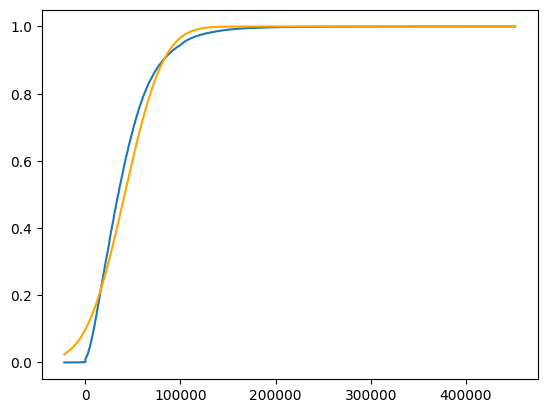

In [196]:
x = np.sort(dohodki)
y = 1. * np.arange(len(x)) / (len(x))
plt.plot(x,y)

s = []
for i in x:
    s.append(stat.NormalDist(povprecje, std).cdf(i))

p2 = plt.plot(x, s, color='orange')

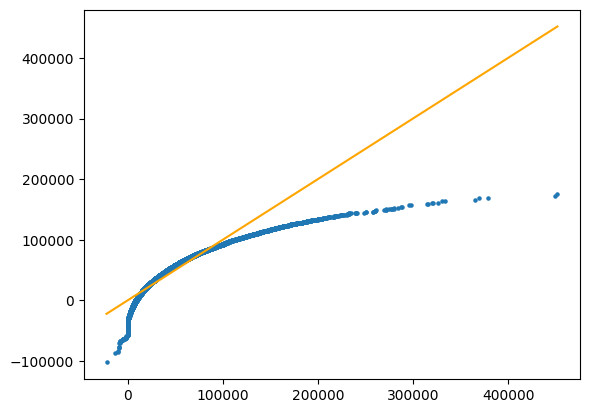

In [197]:
normalna = np.random.normal(povprecje,std,len(x))
normalna.sort()
plt.scatter(x,normalna,s=5)
plt.plot([min(x),max(x)],[min(x),max(x)],color='orange')


Vzemite 1000 enostavnih slučajnih vzorcev velikosti 400 in narišite histogram
vzorčnih povprečij dohodkov družin

In [198]:
n = 400
m = 1000
spovprecij = []
for i in range(m):
    vz = dohodki.sample(n)
    vzpov = vz.mean()
    spovprecij.append(vzpov)

vzorec = dohodki.sample(n) 
std = np.std(vzorec, ddof=1)
N = len(dohodki) 
SE = np.sqrt((N-n)/(N-1) * std**2/n)

In [199]:
Q1 = np.percentile(spovprecij, 25) 
Q3 = np.percentile(spovprecij, 75) 
sirina = 2*(Q3-Q1)/np.cbrt(m)
zacetek =  (min(spovprecij)//sirina)*sirina
konec = (max(spovprecij)//sirina+1)*sirina


(array([7.32381458e-06, 7.32381458e-06, 2.44127153e-05, 4.39428875e-05,
        5.12667020e-05, 8.78857749e-05, 1.07415947e-04, 1.68447735e-04,
        2.34362067e-04, 2.29479523e-04, 2.44127153e-04, 2.51450967e-04,
        2.09949351e-04, 2.29479523e-04, 1.78212821e-04, 1.17181033e-04,
        8.05619604e-05, 6.83556027e-05, 4.63841590e-05, 2.92952583e-05,
        9.76508610e-06, 7.32381458e-06, 0.00000000e+00, 7.32381458e-06]),
 array([36752.7725    , 37162.39510417, 37572.01770833, 37981.6403125 ,
        38391.26291667, 38800.88552083, 39210.508125  , 39620.13072917,
        40029.75333333, 40439.3759375 , 40848.99854167, 41258.62114583,
        41668.24375   , 42077.86635417, 42487.48895833, 42897.1115625 ,
        43306.73416667, 43716.35677083, 44125.979375  , 44535.60197917,
        44945.22458333, 45354.8471875 , 45764.46979167, 46174.09239583,
        46583.715     ]),
 <BarContainer object of 24 artists>)

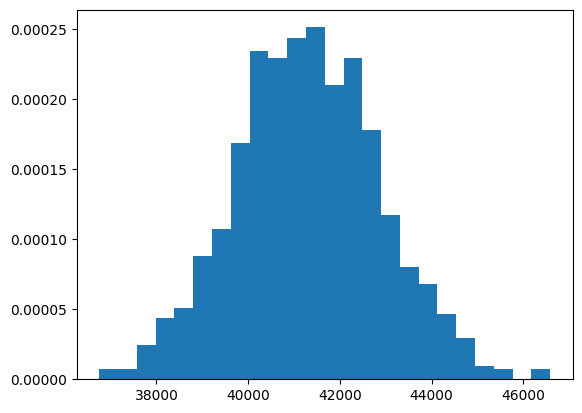

In [200]:
plt.hist(spovprecij, bins=int(((konec - zacetek)//sirina)), range=(min(spovprecij), max(spovprecij)), density=True)

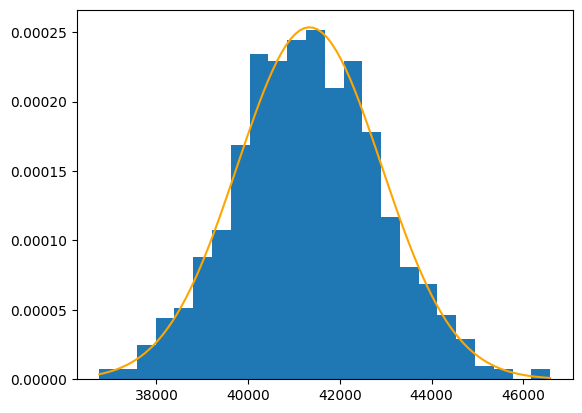

In [201]:
plt.hist(spovprecij, bins=int(((konec - zacetek)//sirina)), range=(min(spovprecij), max(spovprecij)), density=True)
x = np.linspace(min(spovprecij), max(spovprecij), 100)
plt.plot(x, norm.pdf(x,povprecje, SE), color='orange')

Komulativne

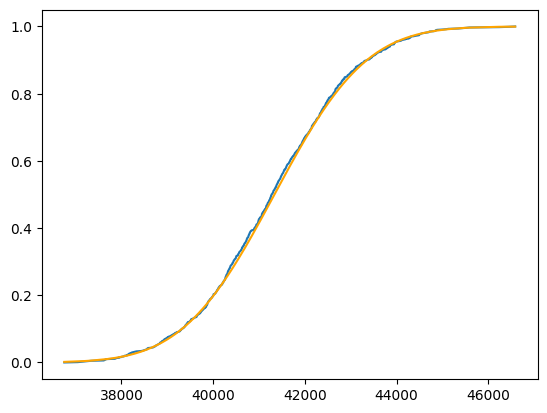

In [202]:
pricakovana_vr = sum(dohodki)/len(dohodki)
x = np.sort(spovprecij)
y = 1. * np.arange(len(x)) / (len(x) - 1)
plt.plot(x,y)

s = []
for i in x:
    s.append(stat.NormalDist(pricakovana_vr, SE).cdf(i))

p2 = plt.plot(x, s, color='orange')

Q-Q grafikon

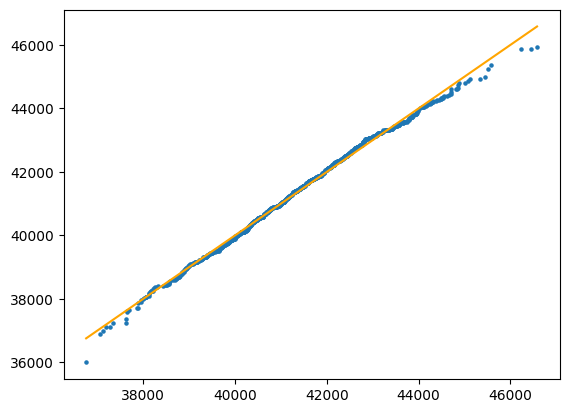

In [203]:
normalna = np.random.normal(pricakovana_vr,SE,len(x))
normalna.sort()
plt.scatter(x,normalna,s=5)
plt.plot([min(x),max(x)],[min(x),max(x)],color='orange')